In [43]:
# Load The Datasets
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import mglearn
import pandas as pd
from pandas.plotting._misc import scatter_matrix
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

In [4]:
datasets = load_iris()

In [5]:
print("keys of Iris datasets : \n{}".format(datasets.keys()))

keys of Iris datasets : 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [8]:
# The Value of the DESCR is the short description of the datasets
print(datasets['DESCR'][:193] + "\n")


.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, pre



In [10]:
# The value of the key target_names is an array of strings, containing the species of flower that we want to predict
print("Target Names: {}".format(datasets['target_names']))

Target Names: ['setosa' 'versicolor' 'virginica']


In [11]:
#The Value of feature_names is a list of strings its giving the description of feature:
print("Feature Names: {}".format(datasets['feature_names']))

Feature Names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [13]:
print("Data Type {}".format(type(datasets['data'])))

Data Type <class 'numpy.ndarray'>


In [16]:
print("Shape Of the Datasets is : {}".format(datasets['data'].shape))

Shape Of the Datasets is : (150, 4)


In [17]:
print("First Five Cloumns of data:\n {}".format(datasets['data'][:5]))

First Five Cloumns of data:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [18]:
print("Type of the Target is: \n{}".format(type(datasets['target'])))

Type of the Target is: 
<class 'numpy.ndarray'>


In [19]:
print("Shape of the Target: {}".format(datasets['target'].shape))

Shape of the Target: (150,)


In [20]:
# The Species are encoded as iuntegers from 0 to 2
print("Target:\n{}".format(datasets['target']))

Target:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


#### Training and Testing  Data

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(datasets['data'], datasets['target'], random_state = 42)

In [28]:
print("X-Train Data Type: {} & Shape: {}".format(type(X_train), X_train.shape))

print("X- test Data Type: {} &n Shape: {}".format(type(X_test), X_test.shape))

print("Y-train Type: {} & shape: {}".format(type(Y_train), Y_train.shape))

print("Y_test type: {} & shape: {}".format(type(Y_test), Y_test.shape))

X-Train Data Type: <class 'numpy.ndarray'> & Shape: (112, 4)
X- test Data Type: <class 'numpy.ndarray'> &n Shape: (38, 4)
Y-train Type: <class 'numpy.ndarray'> & shape: (112,)
Y_test type: <class 'numpy.ndarray'> & shape: (38,)


In [31]:
datasets_dataFrame = pd.DataFrame(X_train, columns = datasets['feature_names'])

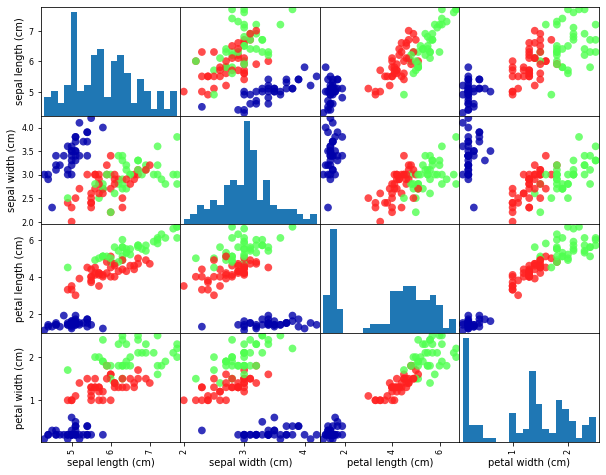

In [42]:
grr = scatter_matrix(datasets_dataFrame, c = Y_train, figsize = (10, 8),
                       marker = 'o', hist_kwds = {'bins':20}, s = 60, alpha = .8, cmap = mglearn.cm3)

#### K-Nearest Neighbors

In [44]:
knn = KNeighborsClassifier(n_neighbors = 1)

In [45]:
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=1)

In [46]:
#Make Predicftions
x_new = np.array([[5, 2.9, 1, 0.2]])

In [47]:
predictions = knn.predict(x_new)
print("Predictions: {}".format(predictions))
print("Predictions Target Name : {}".format(datasets['target_names'][predictions]))

Predictions: [0]
Predictions Target Name : ['setosa']


#### Model Evaluating

In [48]:
y_pred = knn.predict(X_test)
print("Test Set Predictions: \n{}".format(y_pred))

Test Set Predictions: 
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


In [49]:
print("Test Score : {:.2f}".format(np.mean(y_pred==Y_test)))

Test Score : 1.00


In [51]:
print("Test Score: {:.2f}".format(knn.score(X_test, Y_test)))

Test Score: 1.00
